# About Yulu

- Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

- Yulu zones are located at all the appropriate locations (including metro stations, bus stands, office spaces, residential areas, corporate offices, etc) to make those first and last miles smooth, affordable, and convenient!

- Yulu has recently suffered considerable dips in its revenues. They have contracted a consulting company to understand the factors on which the demand for these shared electric cycles depends. Specifically, they want to understand the factors affecting the demand for these shared electric cycles in the Indian market.

#### The company wants to know which variables are significant in predicting the demand for shared electric cycles in the Indian market? How well those variables describe the electric cycle demands?

### Column Profiling:

- datetime: datetime
- season: season (1: spring, 2: summer, 3: fall, 4: winter)
- holiday: whether day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
- weather:
- 1 : Clear, Few clouds, partly cloudy, partly cloudy
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: temperature in Celsius
- atemp: feeling temperature in Celsius
- humidity: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- count: count of total rental bikes including both casual and registered

In [1]:
import numpy as np
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
df=pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df.shape
#There are 10886 rows and 12 columns in this dataset.

(10886, 12)

In [4]:
#The columns are
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [5]:
#Checking for null values
df.isna().sum()
#There are no null values in any of the columns

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [6]:
#Checking data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [7]:
#Changing data type of "datetime" column froom object to datetime64
df['datetime']=pd.to_datetime(df['datetime'])
df.dtypes

datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity               int64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

In [8]:
#Checking no of categories in each column to find whether the column is continuous or categorical
for column in df.columns:
    print('No. of categories in',column,':',df[column].nunique())
#We see that the categorical columns are season, holiday, workingday and weather.
#We can consider the other columns as continuous.

No. of categories in datetime : 10886
No. of categories in season : 4
No. of categories in holiday : 2
No. of categories in workingday : 2
No. of categories in weather : 4
No. of categories in temp : 49
No. of categories in atemp : 60
No. of categories in humidity : 89
No. of categories in windspeed : 28
No. of categories in casual : 309
No. of categories in registered : 731
No. of categories in count : 822


In [9]:
#Segregating categorical and continuous columns
categorical_columns=['season','holiday','workingday','weather']
continuous_columns=['temp','atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
#datetime column is neither continuous nor categorical

In [10]:
#Statistical Summary
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


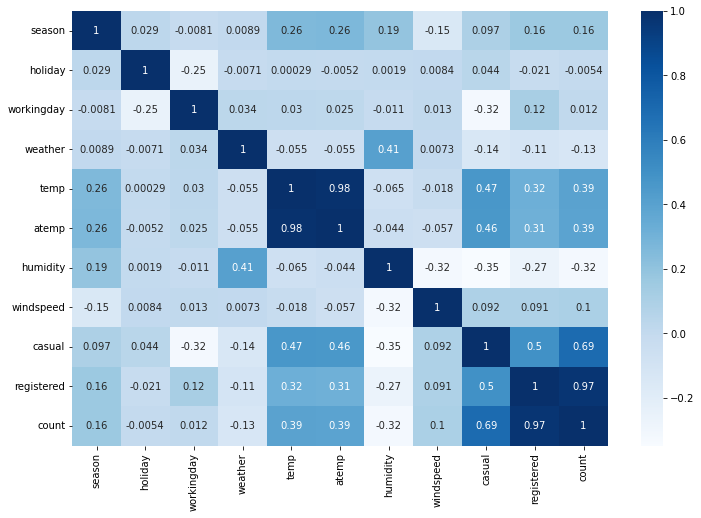

In [11]:
#Finding correlation between the columns
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

- From the heatmap, we see that the dependant column "count" has stronger correlation with registered, casual, temp, atemp and humidity.
- We can ignore the casual and registered column, since count = registered + casual.
- We can consider the column "temp" and not the column "atemp", since atemp is dependent on temp.

In [12]:
#Adding new columns - Year,Month,Week,Week_day,Month_day
df['Year']=df['datetime'].dt.year
df['Month']=df['datetime'].dt.month_name()
df['Week_Day']=df['datetime'].dt.day_name()
df['Month_Day']=df['datetime'].dt.day
df['Hour']=df['datetime'].dt.hour

In [13]:
#Dropping original "datetime" column, since it is no longer required
df.drop(columns='datetime',inplace=True)

In [14]:
#Looking at the updated DataFrame
df.head(3)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,Week_Day,Month_Day,Hour
0,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,January,Saturday,1,0
1,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,January,Saturday,1,1
2,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,January,Saturday,1,2


- We have 5 more new categorical columns - 'Year','Month','Week','Week_Day','Month_Day'

# UNIVARIATE ANALYSIS

### Analysis on Season column

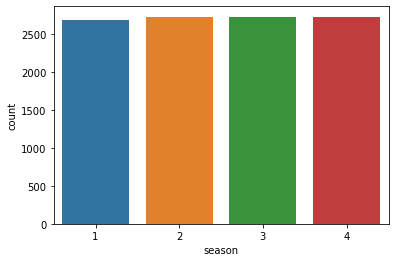

In [15]:
sns.countplot(data=df,x='season')
plt.show()

In [16]:
print(df['season'].value_counts())

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64


In [17]:
print(df['season'].value_counts(normalize=True)*100)

4    25.114826
2    25.105640
3    25.105640
1    24.673893
Name: season, dtype: float64


#### Inference - We see that we have almost equal data points for each of the 4 seasons.

### Analysis on Holiday column

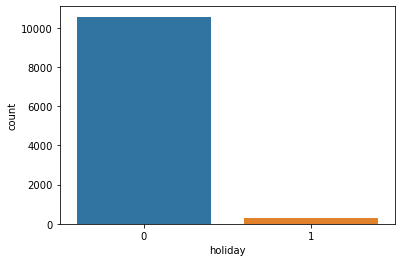

In [18]:
sns.countplot(data=df,x='holiday')
plt.show()

In [19]:
print(df['holiday'].value_counts())

0    10575
1      311
Name: holiday, dtype: int64


In [20]:
print(df['holiday'].value_counts(normalize=True)*100)

0    97.14312
1     2.85688
Name: holiday, dtype: float64


#### Inference - We see that we have very less data for holidays(value=1), which is expected because no of holdays in a year are very less in comparison to non-holidays.

### Analysis on Working-Day column

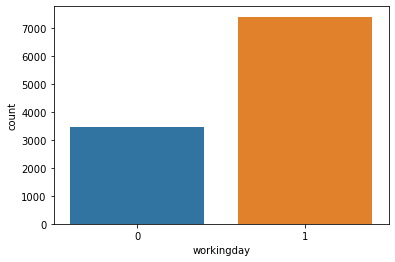

In [21]:
sns.countplot(data=df,x='workingday')
plt.show()

In [22]:
print(df['workingday'].value_counts())

1    7412
0    3474
Name: workingday, dtype: int64


In [23]:
print(df['workingday'].value_counts(normalize=True)*100)

1    68.087452
0    31.912548
Name: workingday, dtype: float64


#### Inference - We see that we have more data for working-days(value=1), which is expected because no of working-days in a year are more in comparison to non-working days.

### Analysis on Weather column

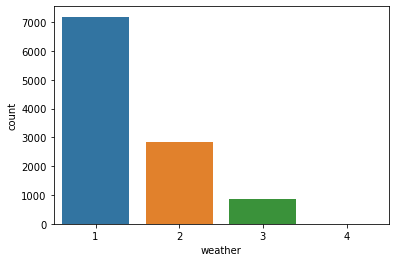

In [24]:
sns.countplot(data=df,x='weather')
plt.show()

In [25]:
print(df['weather'].value_counts())

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64


In [26]:
print(df['weather'].value_counts(normalize=True)*100)

1    66.066507
2    26.033437
3     7.890869
4     0.009186
Name: weather, dtype: float64


- 1 : Clear, Few clouds, partly cloudy, partly cloudy
- 2 : Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3 : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4 : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

#### Inference - We see that we have less data for weather values 3 and 4. Probably this data is for a city that experiences very less snowfall and heavy rain.

### Analysis on Year, Month, Week_Day and Month_Day, Hour columns

In [27]:
print('No Of Year Categories :',df['Year'].nunique())
print(df['Year'].value_counts())

No Of Year Categories : 2
2012    5464
2011    5422
Name: Year, dtype: int64


In [28]:
print('No Of Month Categories :',df['Month'].nunique())
print(df['Month'].value_counts())

No Of Month Categories : 12
May          912
June         912
July         912
August       912
December     912
October      911
November     911
April        909
September    909
February     901
March        901
January      884
Name: Month, dtype: int64


In [29]:
print('No Of Week_Day Categories :',df['Week_Day'].nunique())
print(df['Week_Day'].value_counts())

No Of Week_Day Categories : 7
Saturday     1584
Sunday       1579
Thursday     1553
Monday       1551
Wednesday    1551
Tuesday      1539
Friday       1529
Name: Week_Day, dtype: int64


In [30]:
print('No Of Month_Day Categories :',df['Month_Day'].nunique())
print(df['Month_Day'].value_counts())

No Of Month_Day Categories : 19
1     575
9     575
17    575
5     575
16    574
15    574
14    574
13    574
19    574
8     574
7     574
4     574
2     573
12    573
3     573
6     572
10    572
11    568
18    563
Name: Month_Day, dtype: int64


In [31]:
print('No Of Hour Categories :',df['Hour'].nunique())
print(df['Hour'].value_counts())

No Of Hour Categories : 24
12    456
13    456
22    456
21    456
20    456
19    456
18    456
17    456
16    456
15    456
14    456
23    456
11    455
10    455
9     455
8     455
7     455
6     455
0     455
1     454
5     452
2     448
4     442
3     433
Name: Hour, dtype: int64


#### Inference - We see that we have almost same number of data points for each category of year, month, month_day, week_day and hour. One observation is that we only have data for month_days from 1 to 19.

### Analysis on Temp column

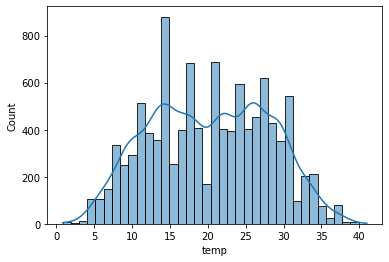

In [32]:
sns.histplot(data=df,x='temp',kde=True)
plt.show()

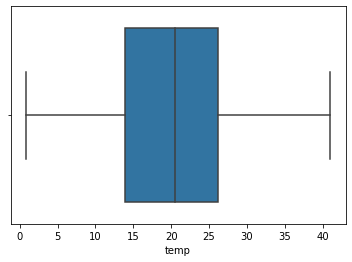

In [33]:
sns.boxplot(data=df,x='temp')
plt.show()

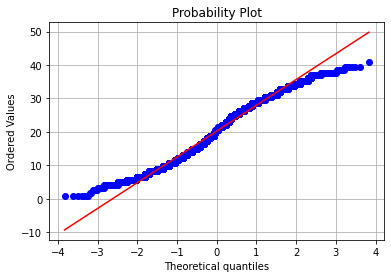

In [34]:
#Checking if Temp column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['temp'],dist=stats.norm,plot=ax1)
plt.show()
#Temp column does not follow a normal distribution

### Analysis on A-Temp column

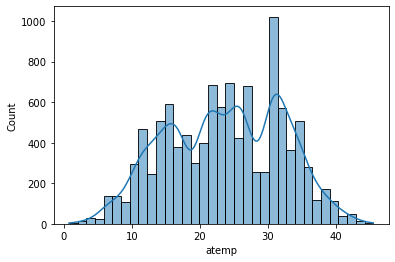

In [35]:
sns.histplot(data=df,x='atemp',kde=True)
plt.show()

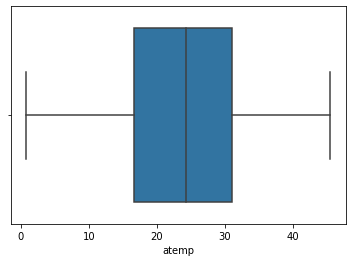

In [36]:
sns.boxplot(data=df,x='atemp')
plt.show()

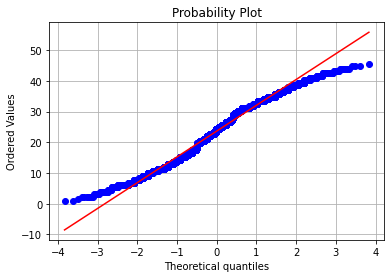

In [37]:
#Checking if A-Temp column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['atemp'],dist=stats.norm,plot=ax1)
plt.show()
#A-Temp column does not follow a normal distribution

### Analysis on Humidity column

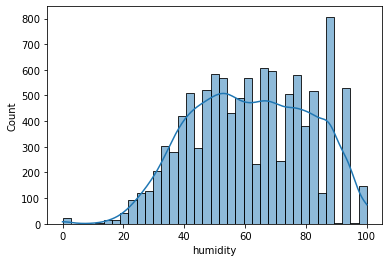

In [38]:
sns.histplot(data=df,x='humidity',kde=True)
plt.show()

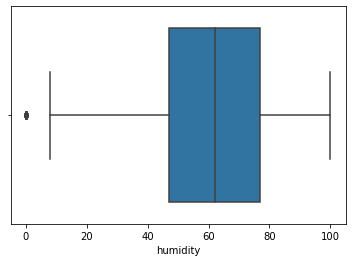

In [39]:
sns.boxplot(data=df,x='humidity')
plt.show()
#We see that there are a few outliers in the left side.

In [40]:
#Since there are a few outliers in the humidity column, therefore we can remove them.
q1=np.percentile(df['humidity'],25)
q3=np.percentile(df['humidity'],75)
iqr=q3-q1
df=df[(df['humidity']>q1-1.5*iqr)]

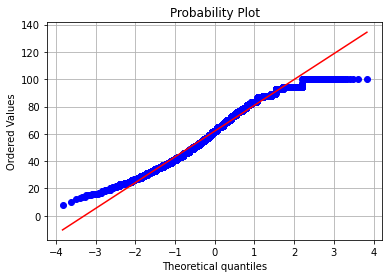

In [41]:
#Checking if Humidity column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['humidity'],dist=stats.norm,plot=ax1)
plt.show()
#Humidity column does not follow a normal distribution

### Analysis on Windspeed column

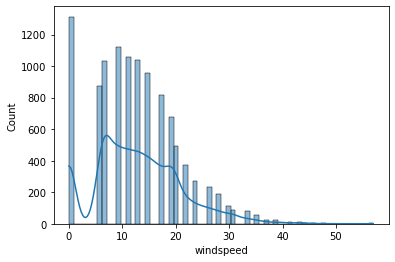

In [42]:
sns.histplot(data=df,x='windspeed',kde=True)
plt.show()

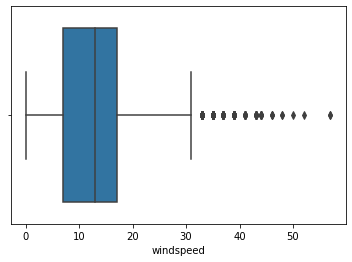

In [43]:
sns.boxplot(data=df,x='windspeed')
plt.show()
#We see that there are some outliers in the right side.

In [44]:
#Since there are a few outliers in the windspeed column, therefore we can remove them.
q1=np.percentile(df['windspeed'],25)
q3=np.percentile(df['windspeed'],75)
iqr=q3-q1
df=df[(df['windspeed']<q3+1.5*iqr)]

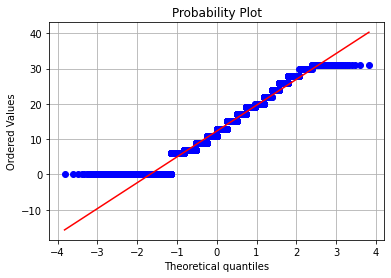

In [45]:
#Checking if Windspeed column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['windspeed'],dist=stats.norm,plot=ax1)
plt.show()
#Windspeed column does not follow a normal distribution

### Analysis on Casual column

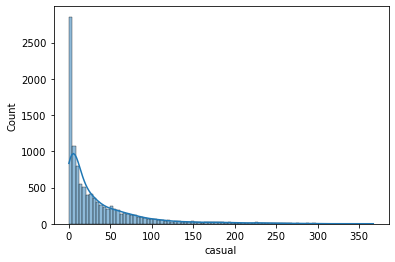

In [46]:
sns.histplot(data=df,x='casual',kde=True)
plt.show()
#It is right skewed

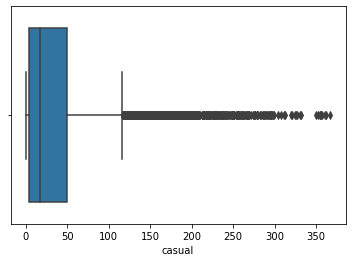

In [47]:
sns.boxplot(data=df,x='casual')
plt.show()
#We see that there are a lot of outliers in the right side.

In [48]:
#Since there are a few outliers in the casual column, therefore we can remove them.
q1=np.percentile(df['casual'],25)
q3=np.percentile(df['casual'],75)
iqr=q3-q1
df=df[(df['casual']<q3+1.5*iqr)]

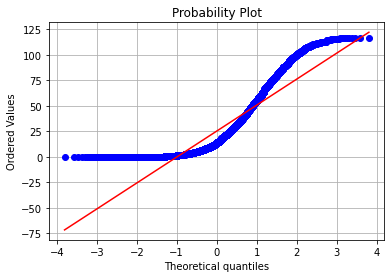

In [49]:
#Checking if Casual column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['casual'],dist=stats.norm,plot=ax1)
plt.show()
#Casual column does not follow a normal distribution

### Analysis on Registered column

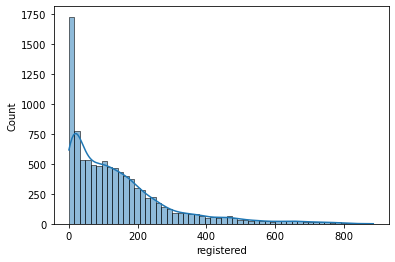

In [50]:
sns.histplot(data=df,x='registered',kde=True)
plt.show()
#It is ritgh skewed

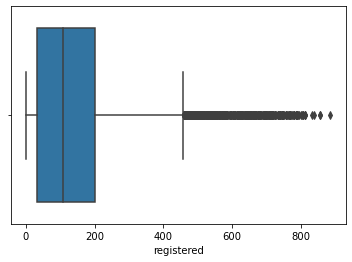

In [51]:
sns.boxplot(data=df,x='registered')
plt.show()
#We see that there are a lot of outliers in the right side.

In [52]:
#Since there are a few outliers in the Registered column, therefore we can remove them.
q1=np.percentile(df['registered'],25)
q3=np.percentile(df['registered'],75)
iqr=q3-q1
df=df[(df['registered']<q3+1.5*iqr)]

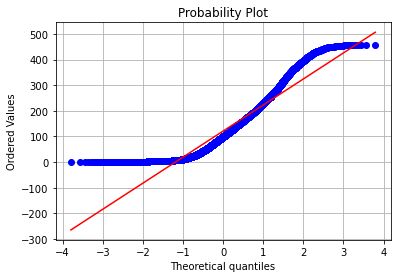

In [53]:
#Checking if Registered column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['registered'],dist=stats.norm,plot=ax1)
plt.show()
#Registered column does not follow a normal distribution

### Analysis on Count column

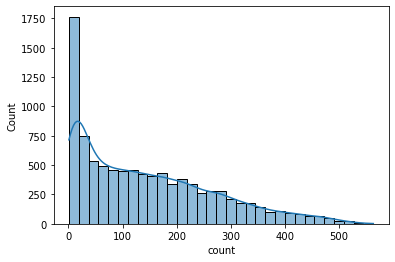

In [54]:
sns.histplot(data=df,x='count',kde=True)
plt.show()
#It is right skewed.

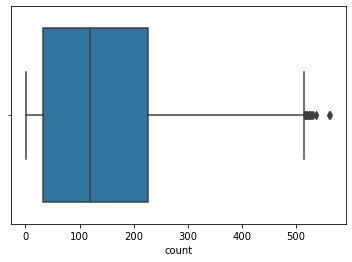

In [55]:
sns.boxplot(data=df,x='count')
plt.show()
#We see that there are a lot of outliers in the right side.

In [56]:
#Since there are a few outliers in the Count column, therefore we can remove them.
q1=np.percentile(df['count'],25)
q3=np.percentile(df['count'],75)
iqr=q3-q1
df=df[(df['count']<q3+1.5*iqr)]

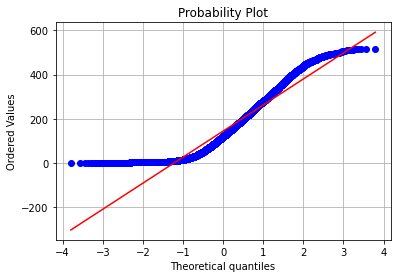

In [57]:
#Checking if Count column follows a normal distribution
fig,ax1=plt.subplots()
plt.grid()
stats.probplot(x=df['count'],dist=stats.norm,plot=ax1)
plt.show()
#Count column does not follow a normal distribution

# Bi-Variate Analysis.

### Season And Count

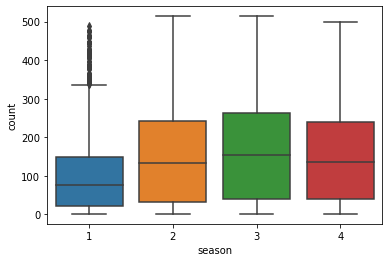

In [58]:
sns.boxplot(data=df,x='season',y='count')
plt.show()

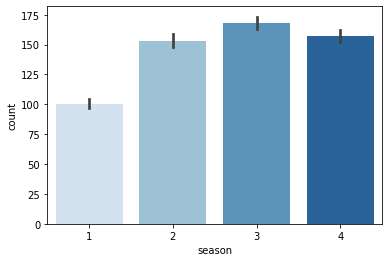

In [59]:
sns.barplot(data=df,x='season',y='count',palette='Blues')
plt.show()

#### Inference - The mean count of electric cycles rented is highest for season 3 and lowest for season 1.

### Holiday And Count

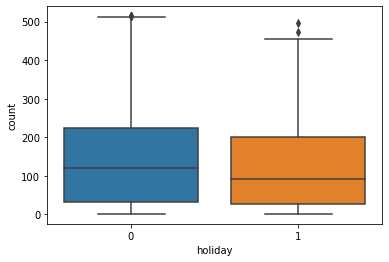

In [60]:
sns.boxplot(data=df,x='holiday',y='count')
plt.show()

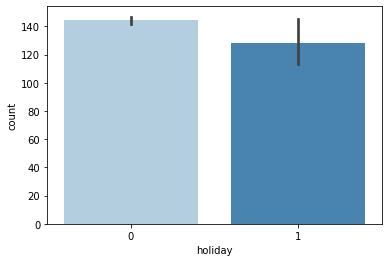

In [61]:
sns.barplot(data=df,x='holiday',y='count',palette='Blues')
plt.show()

#### Inference - The mean count of electric cycles rented for non-holidays is more than holidays.

### Working-Day And Count

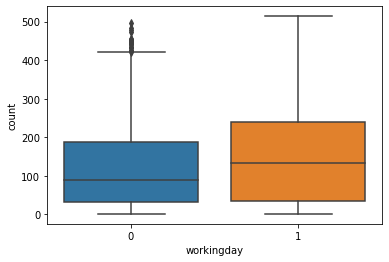

In [62]:
sns.boxplot(data=df,x='workingday',y='count')
plt.show()

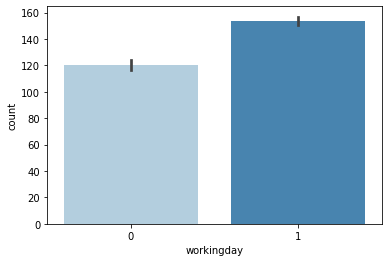

In [63]:
sns.barplot(data=df,x='workingday',y='count',palette='Blues')
plt.show()

#### Inference - The mean count of electric cycles rented for working-days is more than non working-days.

### Weather And Count

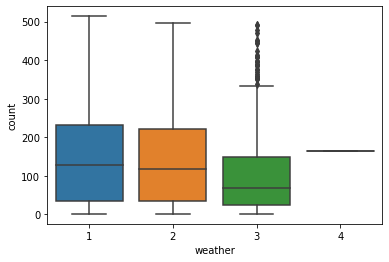

In [64]:
sns.boxplot(data=df,x='weather',y='count')
plt.show()

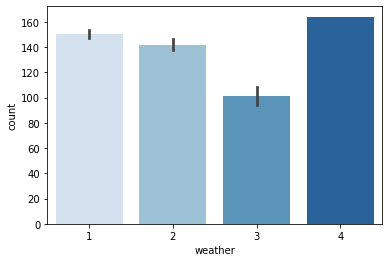

In [65]:
sns.barplot(data=df,x='weather',y='count',palette='Blues')
plt.show()

#### Inference - We saw earlier that we juist have 1 data point for weather 4, hence we can ignore it. The mean and median count of electric cycles rented is greater for weather 1 and weather2.

### Temp And Count

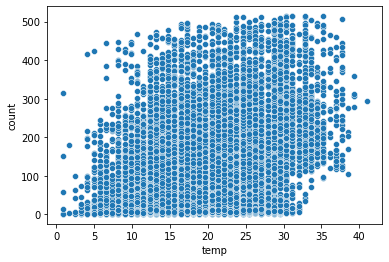

In [66]:
sns.scatterplot(data=df,x='temp',y='count')
plt.show()

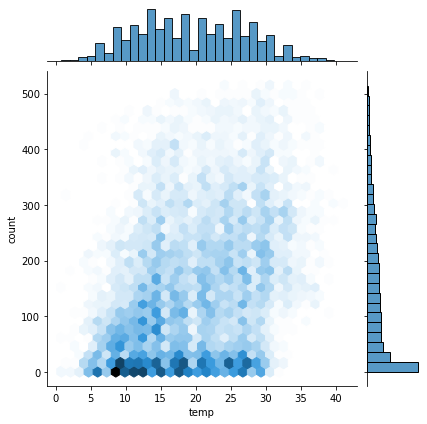

In [67]:
sns.jointplot(data=df,x='temp',y='count',kind='hex')
plt.show()

#### Inference - We can conclude that count and temp do not have a linear relationship.

### A-Temp And Count

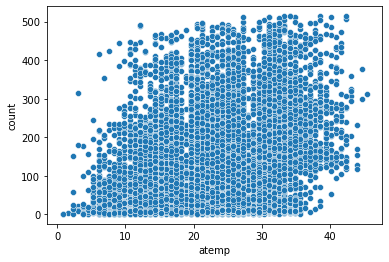

In [68]:
sns.scatterplot(data=df,x='atemp',y='count')
plt.show()

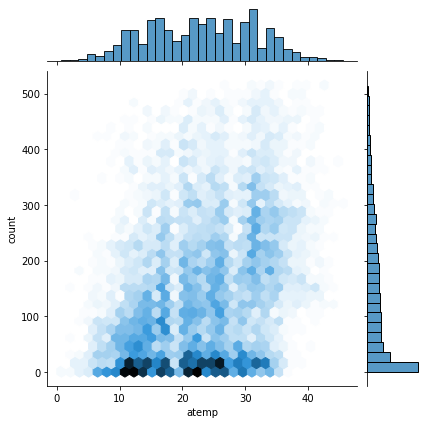

In [69]:
sns.jointplot(data=df,x='atemp',y='count',kind='hex')
plt.show()

#### Inference - We can conclude that count and a-temp do not have a linear relationship.

### Humidity And Count

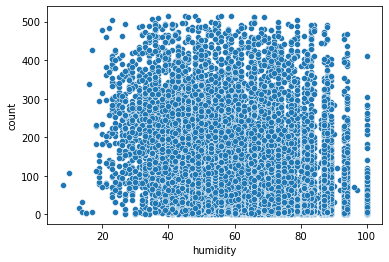

In [70]:
sns.scatterplot(data=df,x='humidity',y='count')
plt.show()

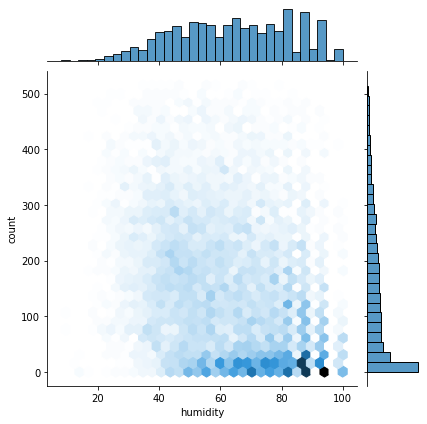

In [71]:
sns.jointplot(data=df,x='humidity',y='count',kind='hex')
plt.show()

#### Inference - We can conclude that count and humidity do not have a linear relationship.

### Windspeed And Count

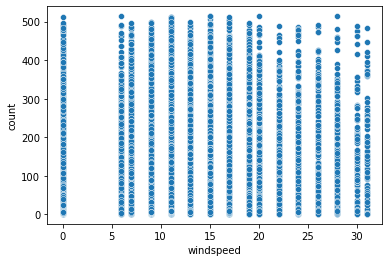

In [72]:
sns.scatterplot(data=df,x='windspeed',y='count')
plt.show()

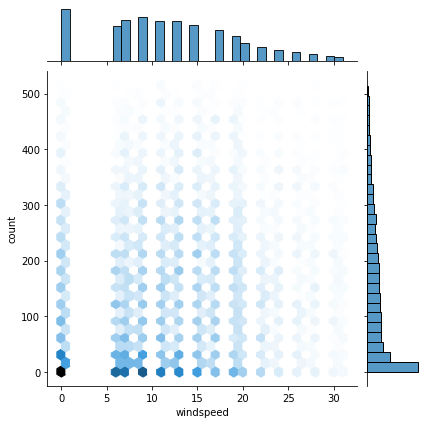

In [73]:
sns.jointplot(data=df,x='windspeed',y='count',kind='hex')
plt.show()

#### Inference - We can conclude that count and windspeed do not have a linear relationship.

### Casual And Count

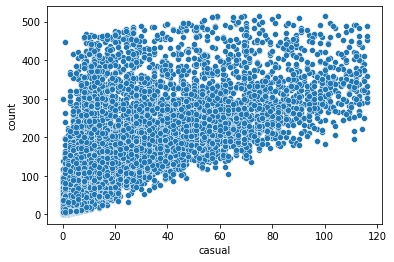

In [74]:
sns.scatterplot(data=df,x='casual',y='count')
plt.show()

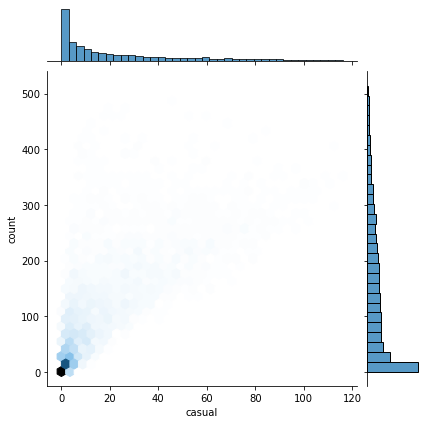

In [75]:
sns.jointplot(data=df,x='casual',y='count',kind='hex')
plt.show()

#### Inference - We can observe that count and casual have a positive relationship, but it is not perfectly linear. Also this relationship is expected since count = registered + casual.

### Registered And Count

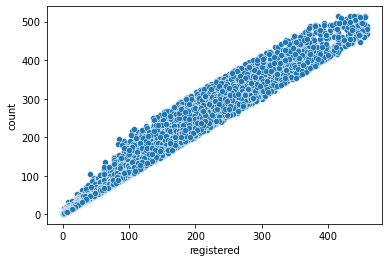

In [76]:
sns.scatterplot(data=df,x='registered',y='count')
plt.show()

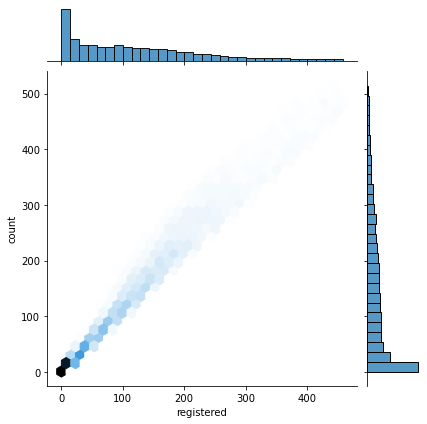

In [77]:
sns.jointplot(data=df,x='registered',y='count',kind='hex')
plt.show()

#### Inference - We can observe that count and registered have a positive linear relationship, but it is not perfectly linear. Also this relationship is expected since count = registered + casual.

### Year And Count

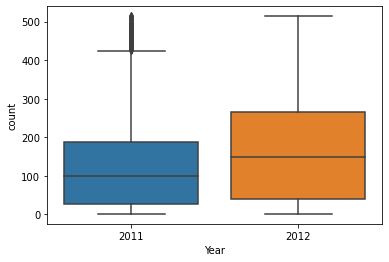

In [78]:
sns.boxplot(data=df,x='Year',y='count')
plt.show()

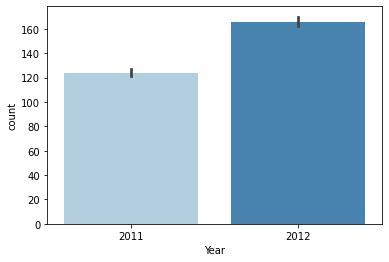

In [79]:
sns.barplot(data=df,x='Year',y='count',palette='Blues')
plt.show()

#### Inference - We observe that the mean and median count of electric cycles is rented is more in 2012 than 2011.

### Month And Count

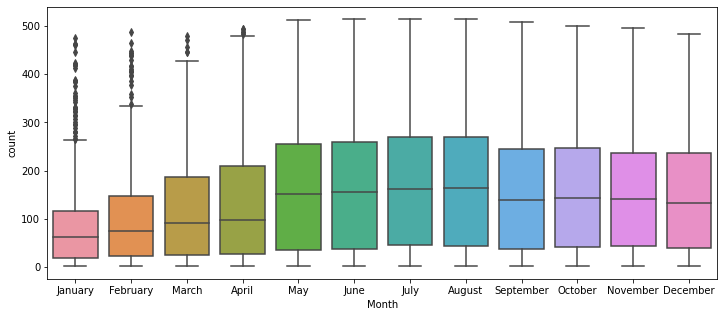

In [80]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df,x='Month',y='count')
plt.show()

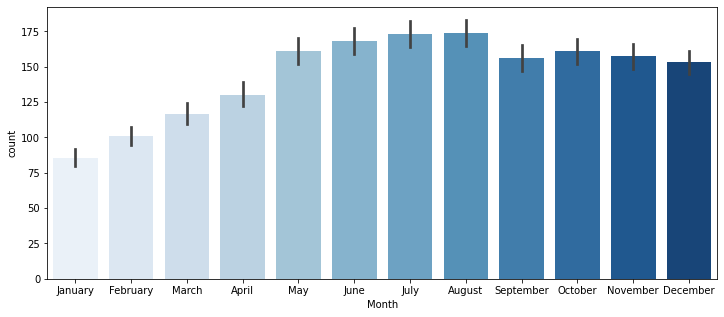

In [81]:
plt.figure(figsize=(12,5))
sns.barplot(data=df,x='Month',y='count',palette='Blues')
plt.show()

#### Inference - We can observe that mean and median count of cycles rented is maximum for the middle 4 months and minimum for the first 4 months.

### Week_day And Count

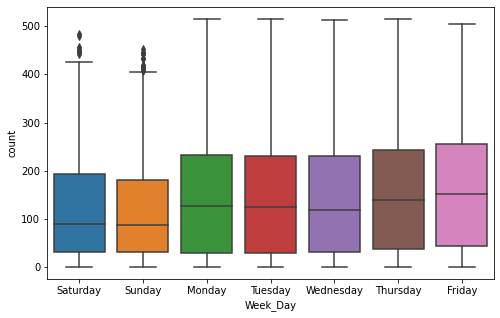

In [82]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Week_Day',y='count')
plt.show()

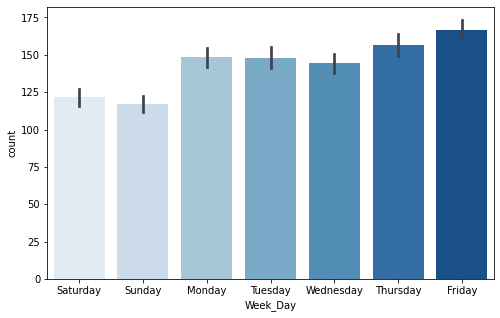

In [83]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Week_Day',y='count',palette='Blues')
plt.show()

#### Inference - We can observe that mean and median count of cycles rented is maximum for Friday and minimum for Sunday and Saturday.

### Month_Day And Count

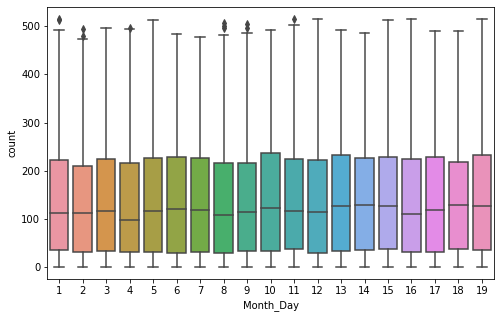

In [84]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Month_Day',y='count')
plt.show()

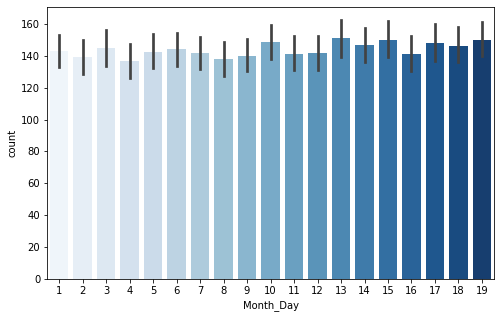

In [85]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Month_Day',y='count',palette='Blues')
plt.show()

#### Inference - We can observe that mean and median count of cycles rented is almost same for all month_days.

### Hour And Count

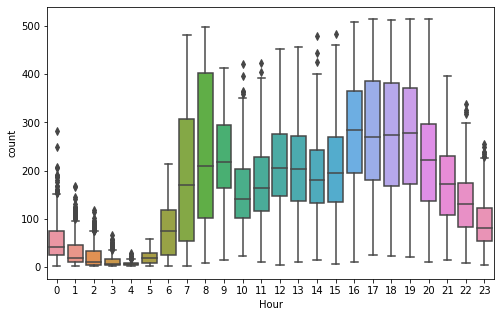

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,x='Hour',y='count')
plt.show()

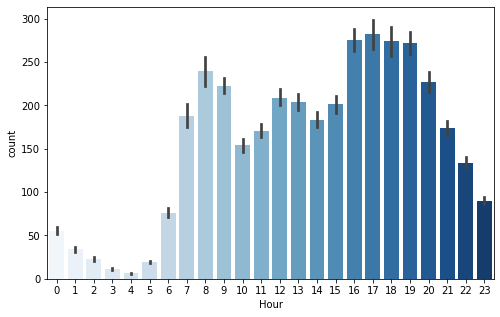

In [87]:
plt.figure(figsize=(8,5))
sns.barplot(data=df,x='Hour',y='count',palette='Blues')
plt.show()

#### Inference - We can observe that mean and median count of cycles rented is minimum from 12 AM to 6 AM, and maximum for 4 PM to 8 PM.

# Hypothesis Testing

- ### 1) To check if Working-Day has an effect on the number of electric cycles rented.

In [88]:
#Lets check the different categories of working day
df['workingday'].unique().tolist()

[0, 1]

In [89]:
#Lets segregate the two datasets
working_day_0 = df.loc[df['workingday']==0,'count']
working_day_1 = df.loc[df['workingday']==1,'count']

In [90]:
#Lets check the length of both datasets.
print(len(working_day_0),len(working_day_1))

2724 6640


- #### We can perform a 2 sample independent t-test to verify whether working-day has an effect on the number of electric cycles rented, since the population mean and standard deviation are unknown.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : Working-Day has no effect on number of electric cycles rented, which can be represented as :  Mean number of cycles sold for category zero is same as mean number of cycles sold for category one : Mean(Category 0) = Mean(Category 1). 
- Alternative Hypothesis : Working-Day has an effect on number of electric cycles rented, which can be represented as :  Mean number of cycles sold for category zero is not same as mean number of cycles sold for category one : Mean(Category 0) != Mean(Category 1).

### Assumptions:
- Population mean and sigma are finite.
- Observations are random and finite.

In [91]:
alpha = 0.05
t_value,p_value=stats.ttest_ind(working_day_0,working_day_1)
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that the working-day has an effect on the mean number of cycles sold.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we can conclude that the working-day has no effect on the mean number of cycles sold.')

p-value for two tailed test is 2.2552148137228035e-33

Conclusion - Since p-value(2.2552148137228035e-33) <= alpha(0.05)
We reject the null hypothesis H0.
So we can conclude that the working-day has an effect on the mean number of cycles sold.


- ### 2) To check if Holiday has an effect on the number of electric cycles rented.

In [92]:
#Lets check the different categories of holiday
df['holiday'].unique().tolist()

[0, 1]

In [93]:
#Lets segregate the two datasets
holiday_0 = df.loc[df['holiday']==0,'count']
holiday_1 = df.loc[df['holiday']==1,'count']

In [94]:
#Lets check the length of both datasets.
print(len(holiday_0),len(holiday_1))

9113 251


- #### We can perform a 2 sample independent t-test to verify whether holiday has an effect on the number of electric cycles rented, since the population mean and standard deviation are unknown.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : Holiday has no effect on number of electric cycles rented, which can be represented as :  Mean number of cycles sold for holiday zero is same as mean number of cycles sold for holiday one : Mean(Holiday 0) = Mean(Holiday 1). 
- Alternative Hypothesis : Holiday has an effect on number of electric cycles rented, which can be represented as :  Mean number of cycles sold for Holiday zero is not same as mean number of cycles sold for Holiday one : Mean(Holiday 0) != Mean(Holiday 1).

### Assumptions:
- Population mean and sigma are finite.
- Observations are random and finite.

In [95]:
alpha = 0.05
t_value,p_value=stats.ttest_ind(holiday_0,holiday_1)
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that the Holiday has an effect on the mean number of cycles sold.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we can conclude that the Holiday has no effect on the mean number of cycles sold.')

p-value for two tailed test is 0.04273994729053667

Conclusion - Since p-value(0.04273994729053667) <= alpha(0.05)
We reject the null hypothesis H0.
So we can conclude that the Holiday has an effect on the mean number of cycles sold.


- ### 3) To check if no. of cycles rented is similar or different for different Weather categories

In [96]:
#Lets check the different categories of weather
df['weather'].unique().tolist()

[1, 2, 3, 4]

In [97]:
#Lets segregate the two datasets
weather_1 = df.loc[df['weather']==1,'count']
weather_2 = df.loc[df['weather']==2,'count']
weather_3 = df.loc[df['weather']==3,'count']
weather_4 = df.loc[df['weather']==4,'count']

In [98]:
#Lets check the length of both datasets.
print(len(weather_1),len(weather_2),len(weather_3),len(weather_4))

6059 2533 771 1


- #### We can perform a One-Way ANOVA test to verify whether Weather has an effect on the number of electric cycles rented, since the no. of categories are more than 2.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : Weather has no effect on the number of electric cycles rented, which can be represented as :  There is no difference between the mean number of cycles sold for the different weather categories.
- Alternative Hypothesis : Weather has an effect on the number of electric cycles rented, which can be represented as :  There is difference between the mean number of cycles sold for the different weather categories.

### Assumptions:
- Variance of each group is almost same.
- Observations are random and finite.

In [99]:
alpha = 0.05
f_value, p_value = stats.f_oneway(weather_1,weather_2,weather_3,weather_4)
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that the Weather has an effect on the mean number of cycles sold.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we can conclude that the Weather has no effect on the mean number of cycles sold.')

p-value for two tailed test is 5.95629355789377e-24

Conclusion - Since p-value(5.95629355789377e-24) <= alpha(0.05)
We reject the null hypothesis H0.
So we can conclude that the Weather has an effect on the mean number of cycles sold.


- ### 4) To check if no. of cycles rented is similar or different for different Season categories

In [100]:
#Lets check the different categories of season
df['season'].unique().tolist()

[1, 2, 3, 4]

In [101]:
#Lets segregate the two datasets
season_1 = df.loc[df['season']==1,'count']
season_2 = df.loc[df['season']==2,'count']
season_3 = df.loc[df['season']==3,'count']
season_4 = df.loc[df['season']==4,'count']

In [102]:
#Lets check the length of both datasets.
print(len(season_1),len(season_2),len(season_3),len(season_4))

2448 2249 2230 2437


- #### We can perform a One-Way ANOVA test to verify whether Season has an effect on the number of electric cycles rented, since the no. of categories are more than 2.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : Season has no effect on the number of electric cycles rented, which can be represented as :  There is no difference between the mean number of cycles sold for the different Season categories.
- Alternative Hypothesis : Season has an effect on the number of electric cycles rented, which can be represented as :  There is difference between the mean number of cycles sold for the different Season categories.

### Assumptions:
- Variance of each group is almost same.
- Observations are random and finite.

In [103]:
alpha = 0.05
f_value, p_value = stats.f_oneway(season_1,season_2,season_3,season_4)
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that the Season has an effect on the mean number of cycles sold.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we can conclude that the Season has no effect on the mean number of cycles sold.')

p-value for two tailed test is 9.583582124778882e-94

Conclusion - Since p-value(9.583582124778882e-94) <= alpha(0.05)
We reject the null hypothesis H0.
So we can conclude that the Season has an effect on the mean number of cycles sold.


- ### 5) To check if Weather is dependent on Season

In [104]:
#Lets check the different categories of Season
df['season'].unique().tolist()

[1, 2, 3, 4]

In [105]:
#Lets check the different categories of Weather
df['weather'].unique().tolist()

[1, 2, 3, 4]

- #### We can perform a Chi-Square test to determine whether "Weather" And "Season" are indepedent or dependent on each other, since both are categorical data.
#### Lets define our null and alternative hypothesis
- Null Hypothesis : Weather has no relationship with Season : Weather and Season are independent of each other.
- Alternative Hypothesis : Weather has relationship with Season : Weather and Season are dependent on each other.

### Assumptions:
- Since it is a non-parametric test, therefore there is no assumption about the population.

In [106]:
alpha = 0.05
stat, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(df['weather'],df['season']))
print('p-value for two tailed test is {}'.format(p_value))
print()

if p_value<=alpha:
    print('Conclusion - Since p-value({}) <= alpha({})'.format(p_value,alpha))
    print('We reject the null hypothesis H0.')
    print('So we can conclude that Weather and Season are dependent on each other.')

else:
    print('Conclusion - Since p-value({}) > alpha({})'.format(p_value,alpha))
    print('We cannot reject the null hypothesis H0.')
    print('So we can conclude that Weather and Season are independent of each other.')

p-value for two tailed test is 7.37899576712981e-08

Conclusion - Since p-value(7.37899576712981e-08) <= alpha(0.05)
We reject the null hypothesis H0.
So we can conclude that Weather and Season are dependent on each other.
